In [ ]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [8]:
##load the dataset
df = pd.read_csv("C:/Users/nora_/Downloads/exampleData.csv")
df.head()


,Average speed,Average distance wall
0,32.473008,86.727505
1,31.140416,85.886254
2,31.277370,76.872820
3,31.981650,88.744627
4,31.886575,80.815665


AttributeError: 'DataFrame' object has no attribute 'cluster'

In [9]:
## finding the kvalue
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Average speed', 'Average distance wall']])
    sse.append(km.inertia_)

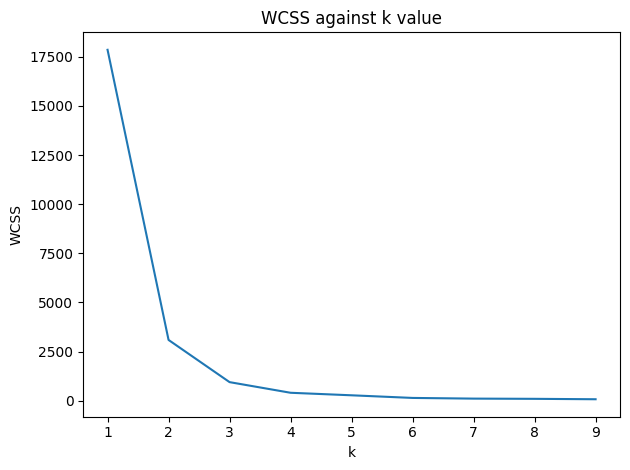

In [11]:
plt.xlabel('k')
plt.ylabel('WCSS')
plt.plot(k_rng, sse)
plt.title('WCSS against k value')
plt.tight_layout()

In [12]:
## use the cluster to be 3
km = KMeans(n_clusters=3)
y_prdicted = km.fit_predict(df[['Average speed', 'Average distance wall']])
y_prdicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [13]:
## put the cluster into the dataframe 
df['Cluster'] = y_prdicted
df

,Average speed,Average distance wall,Cluster
0,32.473008,86.727505,1
1,31.140416,85.886254,1
2,31.277370,76.872820,1
3,31.981650,88.744627,1
4,31.886575,80.815665,1
5,34.982871,79.423943,1
6,32.040986,84.250971,1
7,33.859470,82.017693,1
8,33.802683,78.830084,1
9,31.550047,87.584938,1


In [14]:
## centroid
km.cluster_centers_

array([[26.50149286, 46.79539882],
       [32.49950757, 83.11545013],
       [18.48575312, 33.34169836]])

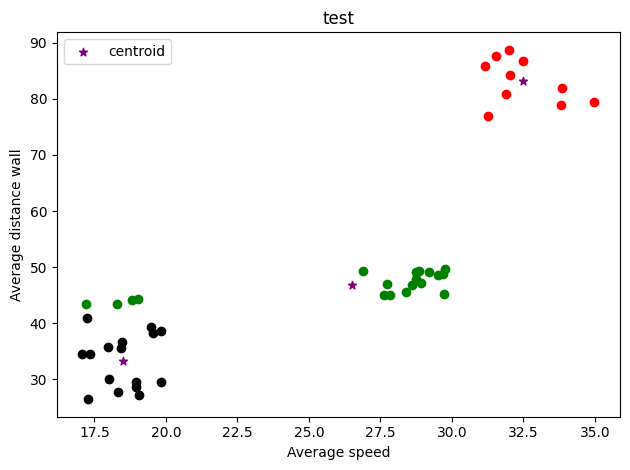

In [22]:
## scatter plot
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1['Average speed'], df1['Average distance wall'], color = 'green')
plt.scatter(df2['Average speed'], df2['Average distance wall'], color = 'red')
plt.scatter(df3['Average speed'], df3['Average distance wall'], color = 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid' )
plt.xlabel('Average speed')
plt.ylabel('Average distance wall')
plt.legend()
plt.title('test')
plt.tight_layout()